In [149]:
import pandas as pd
import re
import emoji
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter
import string 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# *Baca Data Hasil Scraping*

In [150]:
df = pd.read_excel('HasilScraping.xlsx')
df

,Datetime,Tweet Id,Text,Username,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2020-12-30 23:04:28+00:00,1340000000000000000,"Kebangun karena mimpi Tesla gw dibobol orang, ...",PRA7Z,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-30 12:08:12+00:00,1340000000000000000,"bangun pabrik batere, undang tesla semua merk ...",abdalloh,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-30 10:48:31+00:00,1340000000000000000,Antam mau kerjasama dg Tesla : pabrik baterai ...,cxramses,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-30 09:19:03+00:00,1340000000000000000,"Gara-Gara Kadal yang Sedang Hibernasi, Tesla G...",pikiran_rakyat,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-30 08:28:02+00:00,1340000000000000000,"Gokil! Bukan Tesla, Tak Lama Lagi RI Bakal Pun...",ana_khoz,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
557,2020-10-05 16:18:41+00:00,1310000000000000000,Atau mungkin FMC atau GMC bikin pabrik atau ba...,espisangsusu,NaN,NaN,NaN,NaN,NaN,NaN
558,2020-10-05 15:52:03+00:00,1310000000000000000,Teka-teki kemunculan pabrik Gigafactory kedua ...,inewsdotid,NaN,NaN,NaN,NaN,NaN,NaN
559,2020-10-05 15:20:32+00:00,1310000000000000000,Tesla Berencana Buka Pabrik di India pada 2021...,suaradotcom,NaN,NaN,NaN,NaN,NaN,NaN
560,2020-10-02 07:52:04+00:00,1310000000000000000,"@mouldie_sep Ambil sisi positifnya, saatnya mi...",IrfanRinaldi,NaN,NaN,NaN,NaN,NaN,NaN


# Membuang kolom unnamed

In [151]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df

,Datetime,Tweet Id,Text,Username
0,2020-12-30 23:04:28+00:00,1340000000000000000,"Kebangun karena mimpi Tesla gw dibobol orang, ...",PRA7Z
1,2020-12-30 12:08:12+00:00,1340000000000000000,"bangun pabrik batere, undang tesla semua merk ...",abdalloh
2,2020-12-30 10:48:31+00:00,1340000000000000000,Antam mau kerjasama dg Tesla : pabrik baterai ...,cxramses
3,2020-12-30 09:19:03+00:00,1340000000000000000,"Gara-Gara Kadal yang Sedang Hibernasi, Tesla G...",pikiran_rakyat
4,2020-12-30 08:28:02+00:00,1340000000000000000,"Gokil! Bukan Tesla, Tak Lama Lagi RI Bakal Pun...",ana_khoz
...,...,...,...,...
557,2020-10-05 16:18:41+00:00,1310000000000000000,Atau mungkin FMC atau GMC bikin pabrik atau ba...,espisangsusu
558,2020-10-05 15:52:03+00:00,1310000000000000000,Teka-teki kemunculan pabrik Gigafactory kedua ...,inewsdotid
559,2020-10-05 15:20:32+00:00,1310000000000000000,Tesla Berencana Buka Pabrik di India pada 2021...,suaradotcom
560,2020-10-02 07:52:04+00:00,1310000000000000000,"@mouldie_sep Ambil sisi positifnya, saatnya mi...",IrfanRinaldi


# Membuang kolom username dan tweet id

In [152]:
df = pd.DataFrame(df, columns=['Datetime', 'Text'])
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.date
df

,Datetime,Text
0,2020-12-30,"Kebangun karena mimpi Tesla gw dibobol orang, ..."
1,2020-12-30,"bangun pabrik batere, undang tesla semua merk ..."
2,2020-12-30,Antam mau kerjasama dg Tesla : pabrik baterai ...
3,2020-12-30,"Gara-Gara Kadal yang Sedang Hibernasi, Tesla G..."
4,2020-12-30,"Gokil! Bukan Tesla, Tak Lama Lagi RI Bakal Pun..."
...,...,...
557,2020-10-05,Atau mungkin FMC atau GMC bikin pabrik atau ba...
558,2020-10-05,Teka-teki kemunculan pabrik Gigafactory kedua ...
559,2020-10-05,Tesla Berencana Buka Pabrik di India pada 2021...
560,2020-10-02,"@mouldie_sep Ambil sisi positifnya, saatnya mi..."


# **Preprocessing**

In [153]:
import nltk #import library nltk
from nltk.tokenize import word_tokenize #import word_tokenize for tokenizing text into words 
from nltk.tokenize import sent_tokenize #import sent_tokenize for tokenizing paragraph into sentences
from nltk.stem.porter import PorterStemmer #import Porter Stemmer Algorithm 
from nltk.stem import WordNetLemmatizer #import WordNet lemmatizer 
from nltk.corpus import stopwords #import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
import re #import regular expression
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrafi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
df

,Datetime,Text
0,2020-12-30,"Kebangun karena mimpi Tesla gw dibobol orang, ..."
1,2020-12-30,"bangun pabrik batere, undang tesla semua merk ..."
2,2020-12-30,Antam mau kerjasama dg Tesla : pabrik baterai ...
3,2020-12-30,"Gara-Gara Kadal yang Sedang Hibernasi, Tesla G..."
4,2020-12-30,"Gokil! Bukan Tesla, Tak Lama Lagi RI Bakal Pun..."
...,...,...
557,2020-10-05,Atau mungkin FMC atau GMC bikin pabrik atau ba...
558,2020-10-05,Teka-teki kemunculan pabrik Gigafactory kedua ...
559,2020-10-05,Tesla Berencana Buka Pabrik di India pada 2021...
560,2020-10-02,"@mouldie_sep Ambil sisi positifnya, saatnya mi..."


In [155]:
df['Text'] = df['Text'].str.lower()
print('Case Folding Result : \n')
print(df['Text'])
print('\n\n\n')

Case Folding Result : 

0      kebangun karena mimpi tesla gw dibobol orang, ...
1      bangun pabrik batere, undang tesla semua merk ...
2      antam mau kerjasama dg tesla : pabrik baterai ...
3      gara-gara kadal yang sedang hibernasi, tesla g...
4      gokil! bukan tesla, tak lama lagi ri bakal pun...
                             ...                        
557    atau mungkin fmc atau gmc bikin pabrik atau ba...
558    teka-teki kemunculan pabrik gigafactory kedua ...
559    tesla berencana buka pabrik di india pada 2021...
560    @mouldie_sep ambil sisi positifnya, saatnya mi...
561    luhut: tesla berminat inves bikin pabrik bater...
Name: Text, Length: 562, dtype: object






# *Melakukan pembersihan text dalam tweet*

In [156]:
import string 
import re #regex library

# import word_tokenize & FreqDist dari NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

#---- Tokenizing----
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
df['Text'] = df['Text'].apply(remove_tweet_special)

#---Remove Number---
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['Text'] = df['Text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['Text'] = df['Text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['Text'] = df['Text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['Text'] = df['Text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['Text'] = df['Text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tweet_tokens'] = df['Text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(df['tweet_tokens'])
print('\n\n\n')

Tokenizing Result : 

0      [kebangun, karena, mimpi, tesla, gw, dibobol, ...
1      [bangun, pabrik, batere, undang, tesla, semua,...
2      [antam, mau, kerjasama, dg, tesla, pabrik, bat...
3      [garagara, kadal, yang, sedang, hibernasi, tes...
4      [gokil, bukan, tesla, tak, lama, lagi, ri, bak...
                             ...                        
557    [atau, mungkin, fmc, atau, gmc, bikin, pabrik,...
558    [tekateki, kemunculan, pabrik, gigafactory, ke...
559    [tesla, berencana, buka, pabrik, di, india, pada]
560    [sep, ambil, sisi, positifnya, saatnya, minta,...
561    [luhut, tesla, berminat, inves, bikin, pabrik,...
Name: tweet_tokens, Length: 562, dtype: object






# *Mencari distribusi frequensi*

In [157]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

df['tweet_tokens_fdist'] = df['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(df['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(mimpi, 2), (kebangun, 1), (karena, 1), (tesl...
1    [(bangun, 1), (pabrik, 1), (batere, 1), (undan...
2    [(antam, 2), (mau, 1), (kerjasama, 1), (dg, 1)...
3    [(garagara, 1), (kadal, 1), (yang, 1), (sedang...
4    [(gokil, 1), (bukan, 1), (tesla, 1), (tak, 1),...
Name: tweet_tokens_fdist, dtype: object


In [158]:
df.to_csv('HasilCleaning.csv')

# **Melakukan Sentiment Analysis pada Text**

In [159]:
# Import Packages
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import pytz 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ast
import string
from wordcloud import WordCloud
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator

In [160]:
df = pd.read_csv('HasilCleaning.csv')

# Membuat dictionary ayng berisikan kata-kata dalam text

In [161]:
word_dict = {}
for i in range(0,len(df['Text'])):
    sentence = df['Text'][i]
    word_token = word_tokenize(sentence)
    for j in word_token:
        if j not in word_dict:
            word_dict[j] = 1
        else:
            word_dict[j] += 1

In [162]:
negasi = ['bukan','tidak','ga','gk']
lexicon = pd.read_csv('lexicon/modified_full_lexicon.csv')
lexicon = lexicon.drop(lexicon[(lexicon['word'] == 'bukan')
                               |(lexicon['word'] == 'tidak')
                               |(lexicon['word'] == 'ga')|(lexicon['word'] == 'gk') ].index,axis=0)
lexicon = lexicon.reset_index(drop=True)

In [163]:
len(lexicon)

10248

In [164]:
lexicon_word = lexicon['word'].to_list()
lexicon_num_words = lexicon['number_of_words']

In [165]:
ns_words = []
factory = StemmerFactory()
stemmer = factory.create_stemmer()
for word in word_dict.keys():
    if word not in lexicon_word:
        kata_dasar = stemmer.stem(word)
        if kata_dasar not in lexicon_word:
            ns_words.append(word)
len(ns_words)

1482

# Membuat wordlist

In [166]:
len({k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3)) })

232

In [167]:
ns_words_list = {k:v for (k,v) in word_dict.items() if ((k in ns_words)&(v>3))}

In [168]:
sort_orders = sorted(ns_words_list.items(), key=lambda x: x[1], reverse=True)
sort_orders=sort_orders[0:20]
for i in sort_orders:
    print(i[0], i[1])

tesla 620
pabrik 594
di 519
indonesia 209
bangun 181
bikin 117
listrik 101
bakal 90
dan 84
elon 84
musk 81
jateng 80
akan 76
jawa 75
nikel 71
ini 64
untuk 63
yg 59
bisa 51
membangun 48


In [169]:
word_to_plot = df['Text'].copy()

In [170]:
def del_word(x,key_list):
    n = len(key_list)
    word_tokens = word_tokenize(x)
    new_x =''
    for word in word_tokens:
        if word not in key_list:
            new_x = new_x+word+' '
    return new_x

In [171]:
word_to_plot_1 = word_to_plot.apply(lambda x: del_word(x,negasi))

# Membuat WordCloud

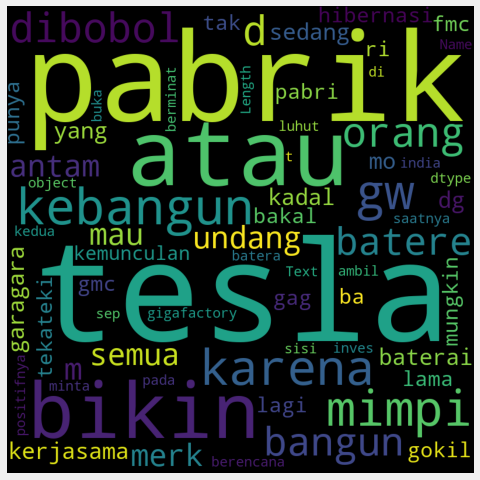

In [172]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000
                      , min_font_size = 20).generate(str(word_to_plot_1))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [173]:
lexicon['number_of_words'].value_counts()

1    9536
2     686
3      24
4       2
Name: number_of_words, dtype: int64

# Melakukan Stemming untuk menentukan nilai sentiment kata

In [174]:
sencol =[]
senrow =np.array([])
nsen = 0
factory = StemmerFactory()
stemmer = factory.create_stemmer()
sentiment_list = []
# function to write the word's sentiment if it is founded
def found_word(ind,words,word,sen,sencol,sentiment,add):
    # if it is already included in the bag of words matrix, then just increase the value
    if word in sencol:
        sen[sencol.index(word)] += 1
    else:
    #if not, than add new word
        sencol.append(word)
        sen.append(1)
        add += 1
    #if there is a negation word before it, the sentiment would be the negation of it's sentiment
    if (words[ind-1] in negasi):
        sentiment += -lexicon['weight'][lexicon_word.index(word)]
    else:
        sentiment += lexicon['weight'][lexicon_word.index(word)]
    
    return sen,sencol,sentiment,add
            
# checking every words, if they are appear in the lexicon, and then calculate their sentiment if they do
for i in range(len(df)):
    nsen = senrow.shape[0]
    words = word_tokenize(df['Text'][i])
    sentiment = 0 
    add = 0
    prev = [0 for ii in range(len(words))]
    n_words = len(words)
    if len(sencol)>0:
        sen =[0 for j in range(len(sencol))]
    else:
        sen =[]
    
    for word in words:
        ind = words.index(word)
        # check whether they are included in the lexicon
        if word in lexicon_word :
            sen,sencol,sentiment,add= found_word(ind,words,word,sen,sencol,sentiment,add)
        else:
        # if not, then check the root word
            kata_dasar = stemmer.stem(word)
            if kata_dasar in lexicon_word:
                sen,sencol,sentiment,add= found_word(ind,words,kata_dasar,sen,sencol,sentiment,add)
        # if still negative, try to match the combination of words with the adjacent words
            elif(n_words>1):
                if ind-1>-1:
                    back_1    = words[ind-1]+' '+word
                    if (back_1 in lexicon_word):
                        sen,sencol,sentiment,add= found_word(ind,words,back_1,sen,sencol,sentiment,add)
                    elif(ind-2>-1):
                        back_2    = words[ind-2]+' '+back_1
                        if back_2 in lexicon_word:
                            sen,sencol,sentiment,add= found_word(ind,words,back_2,sen,sencol,sentiment,add)
    # if there is new word founded, then expand the matrix
    if add>0:  
        if i>0:
            if (nsen==0):
                senrow = np.zeros([i,add],dtype=int)
            elif(i!=nsen):
                padding_h = np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding_h))
                padding_v = np.zeros([(i-nsen),senrow.shape[1]],dtype=int)
                senrow = np.vstack((senrow,padding_v))
            else:
                padding =np.zeros([nsen,add],dtype=int)
                senrow = np.hstack((senrow,padding))
            senrow = np.vstack((senrow,sen))
        if i==0:
            senrow = np.array(sen).reshape(1,len(sen))
    # if there isn't then just update the old matrix
    elif(nsen>0):
        senrow = np.vstack((senrow,sen))
        
    sentiment_list.append(sentiment)

In [175]:
len(sentiment_list)

562

In [176]:
print(senrow.shape[0])

562


In [177]:
sencol.append('sentiment')
sentiment_array = np.array(sentiment_list).reshape(senrow.shape[0],1)
sentiment_data = np.hstack((senrow,sentiment_array))
df_sen = pd.DataFrame(sentiment_data,columns = sencol)

In [178]:
df_sen.head(10)

,karena,mimpi,bobol,rampok,isi,alhamdulillah,cuma,aja,undang,semua,...,membeli,pasang,mikro,perkara,kelar,hitung,ketertarikan,kemunculan,terkuak,sentiment
0,1,2,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,-3
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-7
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,-6
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [179]:
df['sentiment'] = df_sen['sentiment']

In [180]:
df.to_csv('HasilSentiment.csv')

# **Melakukan Naive Bayes**

In [181]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Membuat kolom Sentiment

In [182]:
df = pd.read_csv('HasilSentiment.csv')
df.loc[df['sentiment'] > 3, 'kolom2'] = 1
df.loc[df['sentiment']  <= 3 , 'kolom2'] = 0
df.loc[df['sentiment'] == 0, 'kolom2'] = -1
 
df['sentiment'] = df['kolom2']

df.to_csv('HasilSentimenFinal.csv')

total_data = df

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(total_data['Text'])  
final_vectorized_data

<562x8136 sparse matrix of type '<class 'numpy.int64'>'
	with 19307 stored elements in Compressed Sparse Row format>

In [183]:
df['kolom2'].value_counts()

 0.0    283
 1.0    241
-1.0     38
Name: kolom2, dtype: int64

In [184]:
total_data = total_data.reset_index()

# Membuat Model Train dan Test Naive Bayes

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, total_data['sentiment'],
                                                    test_size=0.2, random_state=1)  

In [186]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (449, 8136)
X_test_shape :  (113, 8136)
y_train_shape :  (449,)
y_test_shape :  (113,)


In [187]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

# Membuat Confiusion Matrix

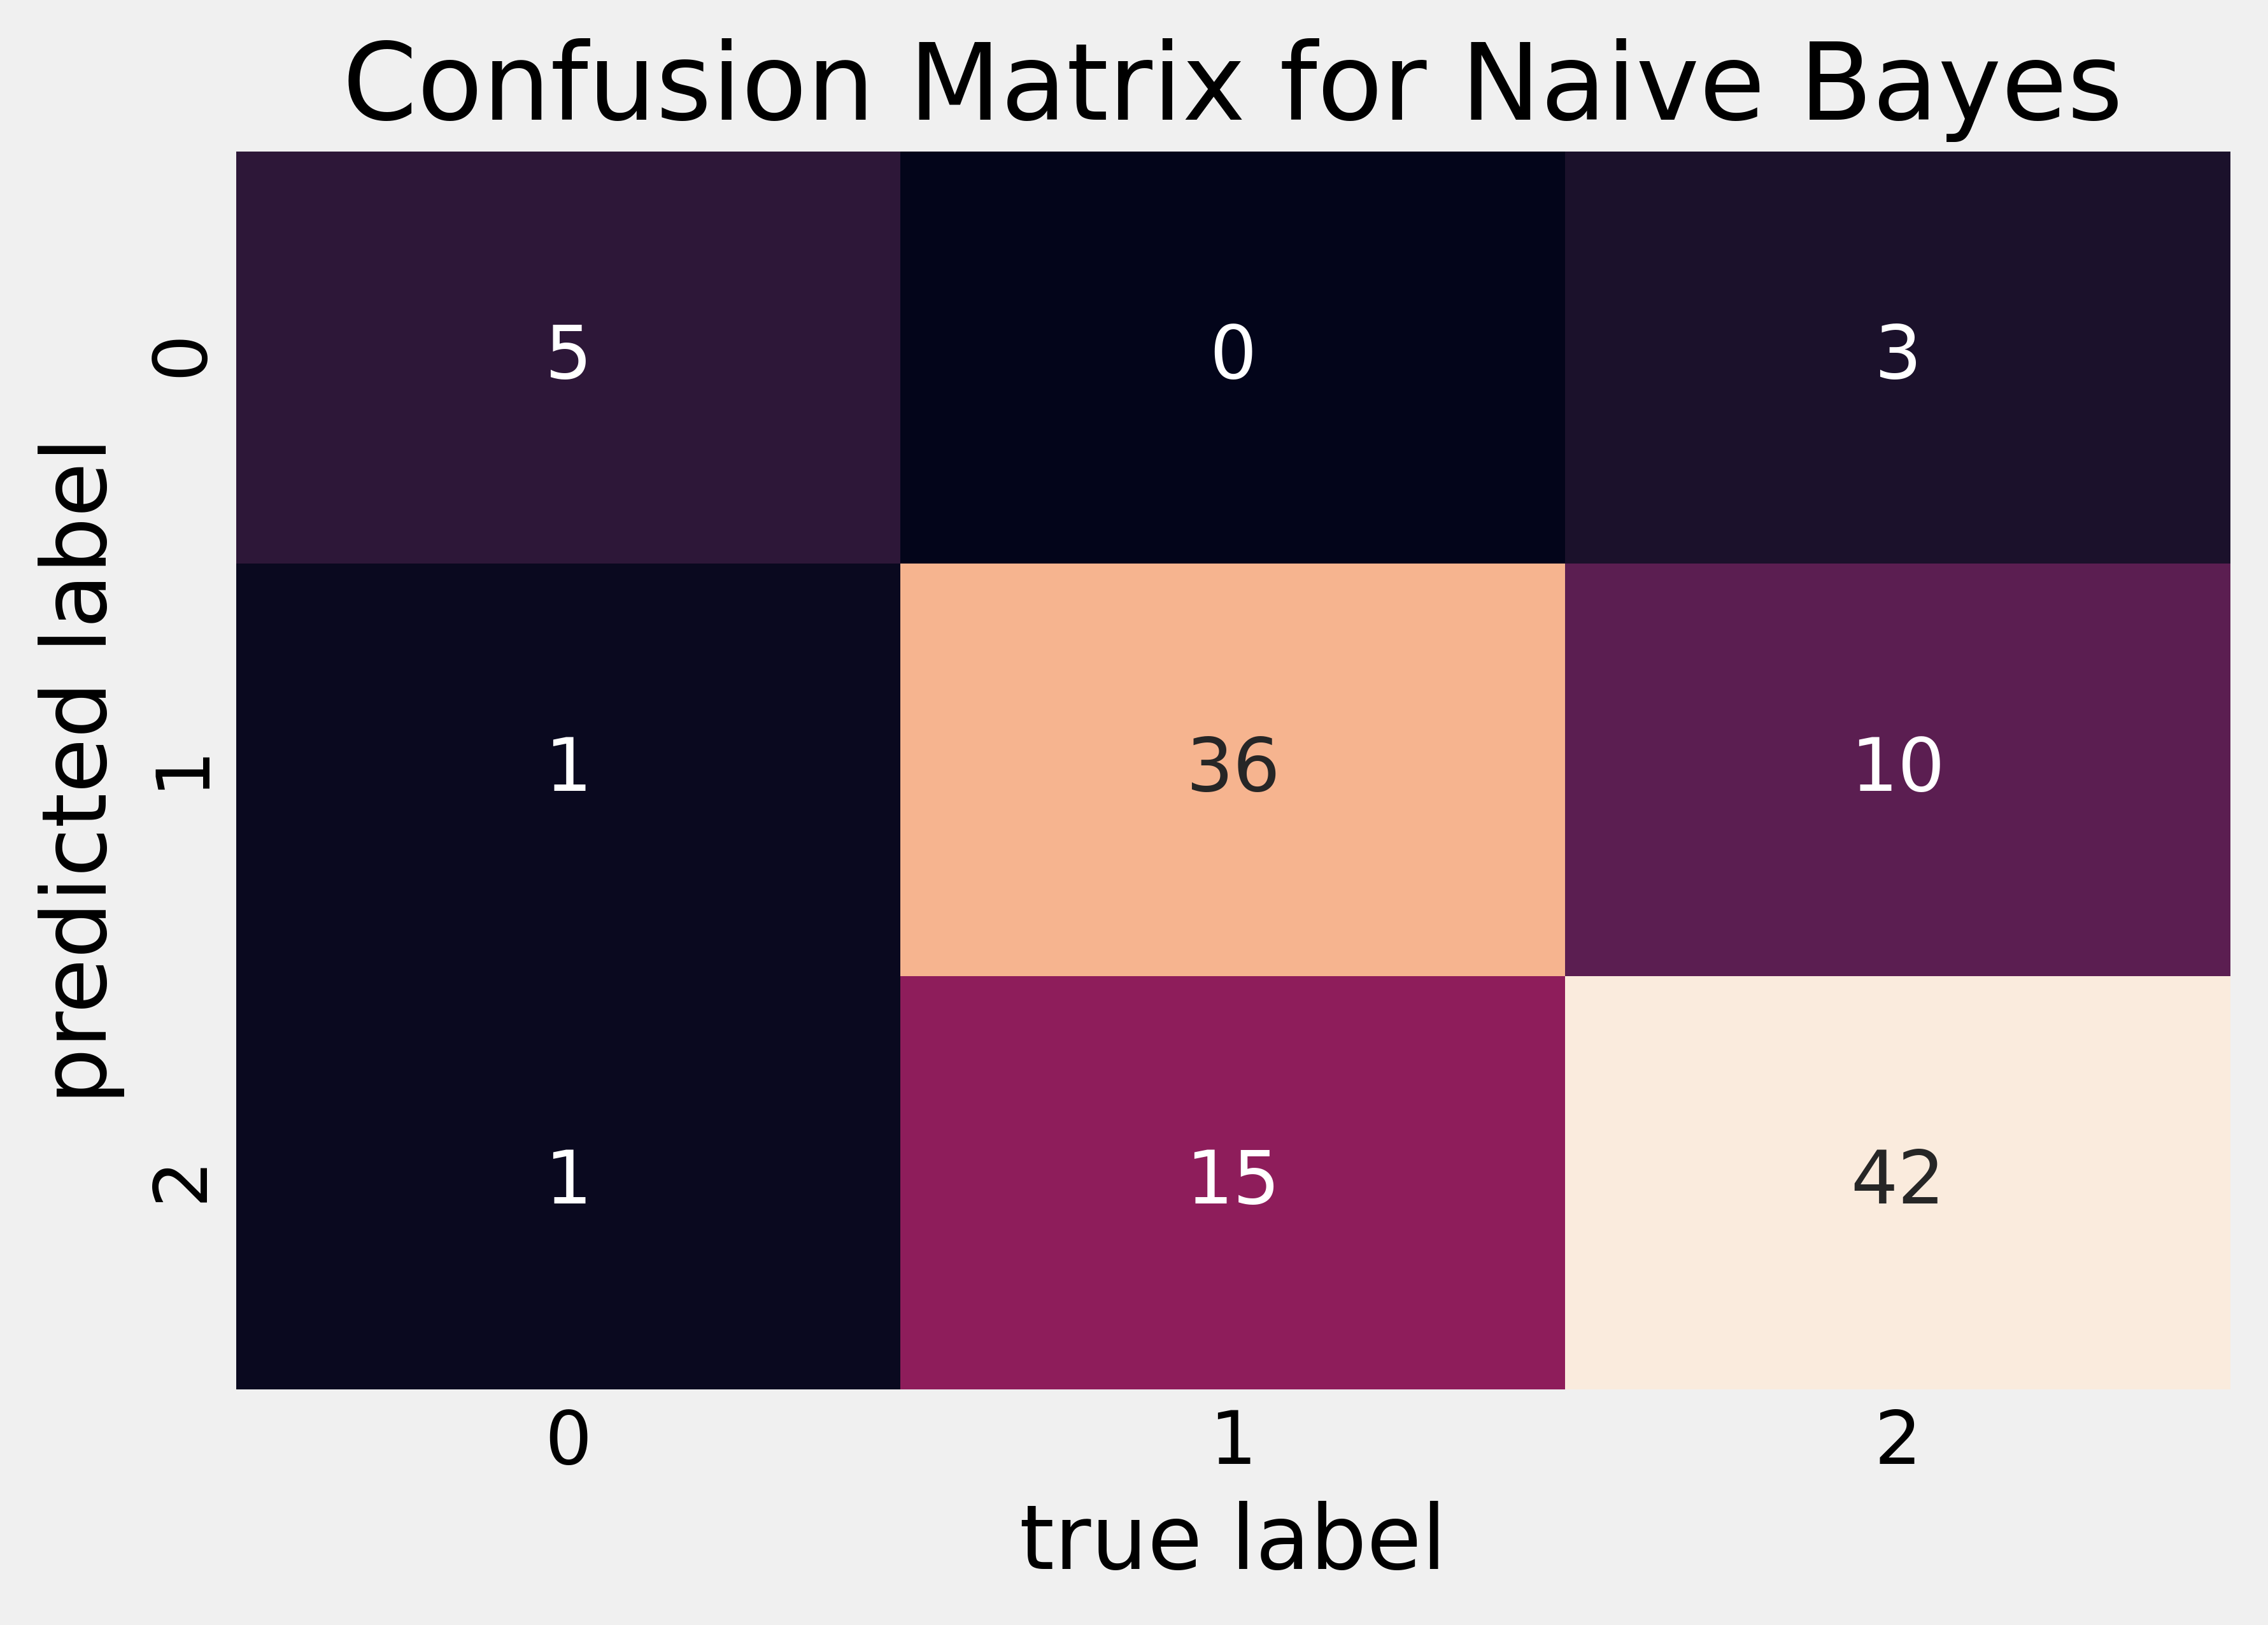

In [188]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

# Melihat tingkat akurasi

In [189]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive*100)

Accuracy with Naive-bayes:  73.45132743362832


In [190]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

        -1.0       0.62      0.71      0.67         7
         0.0       0.77      0.71      0.73        51
         1.0       0.72      0.76      0.74        55

    accuracy                           0.73       113
   macro avg       0.71      0.73      0.71       113
weighted avg       0.74      0.73      0.73       113



# Pearson Corelation

In [191]:
import pandas as pd
from scipy.stats import pearsonr
from matplotlib import pyplot

# Membuat kolom positive, negative dan neutral

In [192]:
tweet = pd.read_csv('HasilSentimenFinal.csv')
tweet = pd.DataFrame(tweet, columns=['Datetime','sentiment'])
tweet.columns =['Date', 'sentiment']
tweet['positive'] = 0
tweet['neutral'] = 0
tweet['negative'] = 0

tweet.loc[tweet['sentiment'] == 1, 'positive'] = 1
tweet.loc[tweet['sentiment'] == 0, 'neutral'] = 1
tweet.loc[tweet['sentiment'] < 0, 'negative'] = 1

antm = pd.read_csv('ANTM.JK.csv')
antm = pd.DataFrame(antm, columns=['Date','Close'])

# Membuat Date menjadi Index dalam antm

In [193]:
antm['Date'] = pd.to_datetime(antm['Date'], errors='coerce')
antm.set_index('Date', inplace=True)
print(antm.index.date)

[datetime.date(2020, 10, 2) datetime.date(2020, 10, 5)
 datetime.date(2020, 10, 6) datetime.date(2020, 10, 7)
 datetime.date(2020, 10, 8) datetime.date(2020, 10, 9)
 datetime.date(2020, 10, 12) datetime.date(2020, 10, 13)
 datetime.date(2020, 10, 14) datetime.date(2020, 10, 15)
 datetime.date(2020, 10, 16) datetime.date(2020, 10, 19)
 datetime.date(2020, 10, 20) datetime.date(2020, 10, 21)
 datetime.date(2020, 10, 22) datetime.date(2020, 10, 23)
 datetime.date(2020, 10, 26) datetime.date(2020, 10, 27)
 datetime.date(2020, 11, 2) datetime.date(2020, 11, 3)
 datetime.date(2020, 11, 4) datetime.date(2020, 11, 5)
 datetime.date(2020, 11, 6) datetime.date(2020, 11, 9)
 datetime.date(2020, 11, 10) datetime.date(2020, 11, 11)
 datetime.date(2020, 11, 12) datetime.date(2020, 11, 13)
 datetime.date(2020, 11, 16) datetime.date(2020, 11, 17)
 datetime.date(2020, 11, 18) datetime.date(2020, 11, 19)
 datetime.date(2020, 11, 20) datetime.date(2020, 11, 23)
 datetime.date(2020, 11, 24) datetime.date(

# Mengubah format Date 

In [194]:
#Convert time_date col to datetime64 dtype

tweet['Date'] = pd.to_datetime(tweet['Date'], utc=True) 
tweet.set_index('Date', inplace=True)
print(tweet.index.date)

[datetime.date(2020, 12, 30) datetime.date(2020, 12, 30)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 30)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 30)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 30)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 30)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 30)
 datetime.date(2020, 12, 29) datetime.date(2020, 12, 29)
 datetime.date(2020, 12, 29) datetime.date(2020, 12, 29)
 datetime.date(2020, 12, 29) datetime.date(2020, 12, 29)
 datetime.date(2020, 12, 28) datetime.date(2020, 12, 28)
 datetime.date(2020, 12, 28) datetime.date(2020, 12, 28)
 datetime.date(2020, 12, 28) datetime.date(2020, 12, 23)
 datetime.date(2020, 12, 23) datetime.date(2020, 12, 22)
 datetime.date(2020, 12, 22) datetime.date(2020, 12, 22)
 datetime.date(2020, 12, 22) datetime.date(2020, 12, 21)
 datetime.date(2020, 12, 21) datetime.date(2020, 12, 21)
 datetime.date(2020, 12, 21) datetime.date(2020, 12, 21)
 datetime.date(2020, 12, 18) da

In [195]:
print(tweet.groupby(tweet.index.date).count())

            sentiment  positive  neutral  negative
2020-10-02          2         2        2         2
2020-10-05          4         4        4         4
2020-10-06          5         5        5         5
2020-10-07          9         9        9         9
2020-10-09          1         1        1         1
2020-10-12          1         1        1         1
2020-10-13          1         1        1         1
2020-10-14          1         1        1         1
2020-10-15          2         2        2         2
2020-10-16          2         2        2         2
2020-10-19         85        85       85        85
2020-10-20         73        73       73        73
2020-10-21         34        34       34        34
2020-10-22         49        49       49        49
2020-10-23         22        22       22        22
2020-10-26         22        22       22        22
2020-10-27         17        17       17        17
2020-11-02          6         6        6         6
2020-11-03          6         6

# Mengubah Date menjadi Index pada Tweet

In [196]:
tweet["_dummy"]=1
tweet=tweet.pivot_table(index=["Date"], columns="sentiment", values="_dummy", aggfunc="sum").fillna(0)
tweet.replace(0, np.nan, inplace=True) #change value 0 to NaN
tweet

result = pd.DataFrame(tweet)
result

sentiment,-1.0,0.0,1.0
Date,,,
2020-10-02 00:00:00+00:00,1.0,1.0,NaN
2020-10-05 00:00:00+00:00,NaN,4.0,NaN
2020-10-06 00:00:00+00:00,NaN,1.0,4.0
2020-10-07 00:00:00+00:00,5.0,1.0,3.0
2020-10-09 00:00:00+00:00,NaN,1.0,NaN
2020-10-12 00:00:00+00:00,NaN,NaN,1.0
2020-10-13 00:00:00+00:00,NaN,1.0,NaN
2020-10-14 00:00:00+00:00,1.0,NaN,NaN
2020-10-15 00:00:00+00:00,NaN,1.0,1.0


In [197]:
output = result.groupby(result.index.date).sum()
output.rename(columns={-1: 'Negative', 0: 'Neutral', 1: 'Positive'}, inplace=True)
output

sentiment,Negative,Neutral,Positive
2020-10-02,1.0,1.0,0.0
2020-10-05,0.0,4.0,0.0
2020-10-06,0.0,1.0,4.0
2020-10-07,5.0,1.0,3.0
2020-10-09,0.0,1.0,0.0
2020-10-12,0.0,0.0,1.0
2020-10-13,0.0,1.0,0.0
2020-10-14,1.0,0.0,0.0
2020-10-15,0.0,1.0,1.0
2020-10-16,0.0,2.0,0.0


In [198]:
difference = antm.diff(axis=0);
print("Difference between rows(Period=1):");
print(difference);

Difference between rows(Period=1):
            Close
Date             
2020-10-02    NaN
2020-10-05   -5.0
2020-10-06    0.0
2020-10-07   -5.0
2020-10-08    5.0
2020-10-09   45.0
2020-10-12   15.0
2020-10-13  -15.0
2020-10-14  190.0
2020-10-15  -20.0
2020-10-16    5.0
2020-10-19  115.0
2020-10-20  -20.0
2020-10-21   65.0
2020-10-22  -15.0
2020-10-23    0.0
2020-10-26  -25.0
2020-10-27   -5.0
2020-11-02   45.0
2020-11-03   10.0
2020-11-04   -5.0
2020-11-05   20.0
2020-11-06    0.0
2020-11-09  115.0
2020-11-10  -40.0
2020-11-11   -5.0
2020-11-12  -25.0
2020-11-13    0.0
2020-11-16   15.0
2020-11-17    5.0
2020-11-18   50.0
2020-11-19   -5.0
2020-11-20  -25.0
2020-11-23   45.0
2020-11-24  -20.0
2020-11-25  -30.0
2020-11-26    5.0
2020-11-27   20.0
2020-11-30  -85.0
2020-12-01   10.0
2020-12-02   90.0
2020-12-03   10.0
2020-12-04  -10.0
2020-12-07   35.0
2020-12-08   20.0
2020-12-10   95.0
2020-12-11   55.0
2020-12-14   75.0
2020-12-15   35.0
2020-12-16  255.0
2020-12-17    0.0
2020-12-18 

In [199]:
end_result = pd.concat([difference, output], axis=1)
end_result

,Close,Negative,Neutral,Positive
2020-10-02,NaN,1.0,1.0,0.0
2020-10-05,-5.0,0.0,4.0,0.0
2020-10-06,0.0,0.0,1.0,4.0
2020-10-07,-5.0,5.0,1.0,3.0
2020-10-08,5.0,NaN,NaN,NaN
2020-10-09,45.0,0.0,1.0,0.0
2020-10-12,15.0,0.0,0.0,1.0
2020-10-13,-15.0,0.0,1.0,0.0
2020-10-14,190.0,1.0,0.0,0.0
2020-10-15,-20.0,0.0,1.0,1.0


In [200]:
end_result = end_result.fillna(0)
end_result

,Close,Negative,Neutral,Positive
2020-10-02,0.0,1.0,1.0,0.0
2020-10-05,-5.0,0.0,4.0,0.0
2020-10-06,0.0,0.0,1.0,4.0
2020-10-07,-5.0,5.0,1.0,3.0
2020-10-08,5.0,0.0,0.0,0.0
2020-10-09,45.0,0.0,1.0,0.0
2020-10-12,15.0,0.0,0.0,1.0
2020-10-13,-15.0,0.0,1.0,0.0
2020-10-14,190.0,1.0,0.0,0.0
2020-10-15,-20.0,0.0,1.0,1.0


In [201]:
hasil = end_result

In [202]:
s = hasil['Close']
x = hasil['Positive']
y = hasil['Neutral']
z = hasil['Negative']

In [203]:
corr, _ = pearsonr(s, x)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.086


In [204]:
corr, _ = pearsonr(s, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.168


In [205]:
corr, _ = pearsonr(s, z)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.018


In [206]:
correlations = hasil.corr(method='pearson')

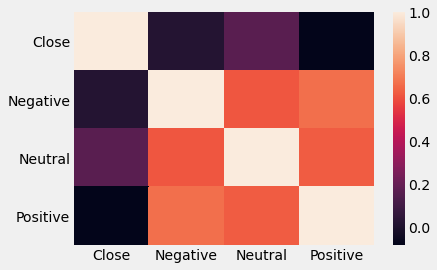

In [207]:
sns.heatmap(correlations)
plt.show()

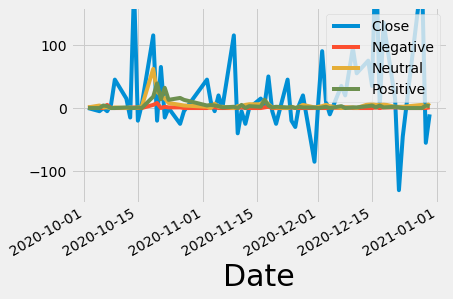

In [208]:
hasil.plot()
plt.xlabel("Date",size=30)
plt.ylim(-150,160)

plt.show()

# Linear Regresion

In [209]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [210]:
hasil['Negative'] = hasil['Negative']*-1
hasil['Neutral'] = hasil['Neutral']*0

In [211]:
hasil['Total'] = x+y+z
hasil

,Close,Negative,Neutral,Positive,Total
2020-10-02,0.0,-1.0,0.0,0.0,-1.0
2020-10-05,-5.0,-0.0,0.0,0.0,0.0
2020-10-06,0.0,-0.0,0.0,4.0,4.0
2020-10-07,-5.0,-5.0,0.0,3.0,-2.0
2020-10-08,5.0,-0.0,0.0,0.0,0.0
2020-10-09,45.0,-0.0,0.0,0.0,0.0
2020-10-12,15.0,-0.0,0.0,1.0,1.0
2020-10-13,-15.0,-0.0,0.0,0.0,0.0
2020-10-14,190.0,-1.0,0.0,0.0,-1.0
2020-10-15,-20.0,-0.0,0.0,1.0,1.0


In [212]:
hasil = hasil.assign(TotalSentiment=hasil.Total.cumsum())
hasil = hasil.assign(TotalSaham=hasil.Close.cumsum())
hasil

,Close,Negative,Neutral,Positive,Total,TotalSentiment,TotalSaham
2020-10-02,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0
2020-10-05,-5.0,-0.0,0.0,0.0,0.0,-1.0,-5.0
2020-10-06,0.0,-0.0,0.0,4.0,4.0,3.0,-5.0
2020-10-07,-5.0,-5.0,0.0,3.0,-2.0,1.0,-10.0
2020-10-08,5.0,-0.0,0.0,0.0,0.0,1.0,-5.0
2020-10-09,45.0,-0.0,0.0,0.0,0.0,1.0,40.0
2020-10-12,15.0,-0.0,0.0,1.0,1.0,2.0,55.0
2020-10-13,-15.0,-0.0,0.0,0.0,0.0,2.0,40.0
2020-10-14,190.0,-1.0,0.0,0.0,-1.0,1.0,230.0
2020-10-15,-20.0,-0.0,0.0,1.0,1.0,2.0,210.0


Estimated coefficients:
b_0 = 137.78217938037116            
b_1 = -1.89363653137563


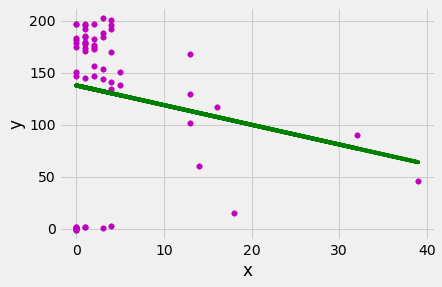

In [213]:

import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
def main():
    # observations / data
    X = hasil['TotalSaham']
    y = hasil['TotalSentiment']
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

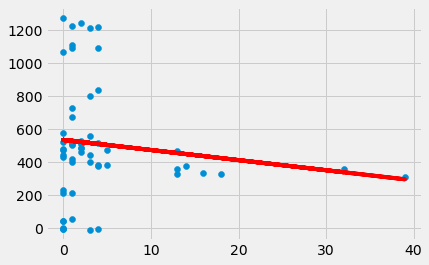

[[-6.12541865]]
[534.15906715]


In [214]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = hasil['TotalSentiment']
y = hasil['TotalSaham']

model = LinearRegression()

x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

model.fit(x,y)

y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

print(model.coef_)
print(model.intercept_)